In [1]:
#config.ipynb contains all the import
%run ../global_class/config.ipynb
#it's a the multipolygone of Shanghai
%run ../global_class/getShanghai.ipynb

In [2]:
df_poi = pd.read_pickle('../pickles/utseus-cendus-poi.pk')

In [3]:
type(df_poi)

pandas.core.frame.DataFrame

In [4]:
df_poi.head()

,NAME,GPSX,GPSY,GBCODE,category,subcategory,subsubcategory
0,2015年中国国际纱线(春夏)展览会,121.296368,31.188324,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name
1,勃兰登堡之声-2015家庭音乐会,121.473360,31.228923,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name
2,2015第十四届(上海)国际有机食品和绿色食品博览会,121.399378,31.205028,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name
3,星星火炬上海组委会,121.529628,31.271063,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name
4,2016VGT国际铁人三项赛,121.169185,31.282332,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name


In [5]:
#df_poi has value
print(len(df_poi))
print(len(df_poi.dropna()))

1755734
1745286


In [6]:
df_poi = df_poi[df_poi.category.notna()]

In [7]:
print(sum(df_poi.GPSX.isna()))
print(sum(df_poi.GPSY.isna()))

0
0


In [8]:
print(type(df_poi.category.iloc[0]))
print(type(df_poi.GPSX.iloc[0]))
print(type(df_poi.GPSY.iloc[0]))

<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [9]:
df_poi = df_poi.rename(columns={"GPSX": "longitude", "GPSY": "latitude"})

In [10]:
gdf_poi = gpd.GeoDataFrame(df_poi, geometry = [Point(x,y) for x,y in zip(df_poi.longitude, df_poi.latitude)])
gdf_poi.crs = {'init': 'epsg:4326'} #world degree

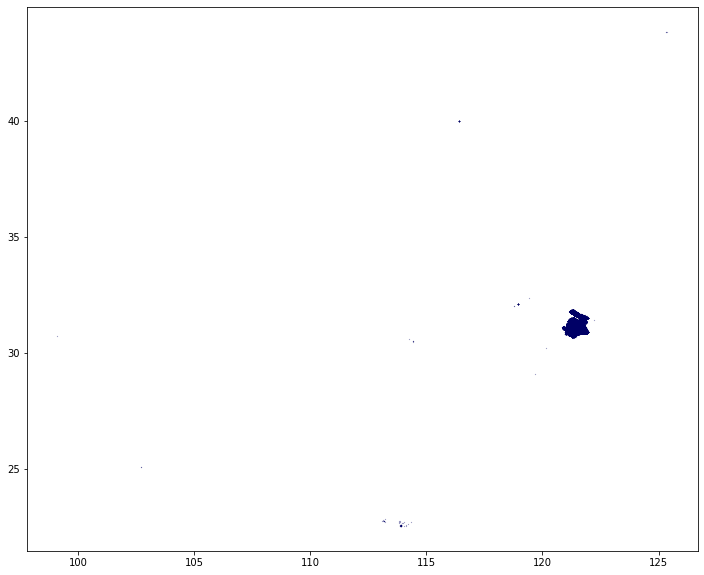

In [11]:
gdf_poi.plot(markersize=0.02, c='#000066', figsize=(15,10))

In [12]:
time = ManagingTime()
time.displayStartTime()

gdf_poi = gdf_poi.loc[gdf_poi.within(shanghai)]

time.displayRunningTime()

Starting time: 2020-01-05 23:49:54.757709
Running time: 0:15:42.027639


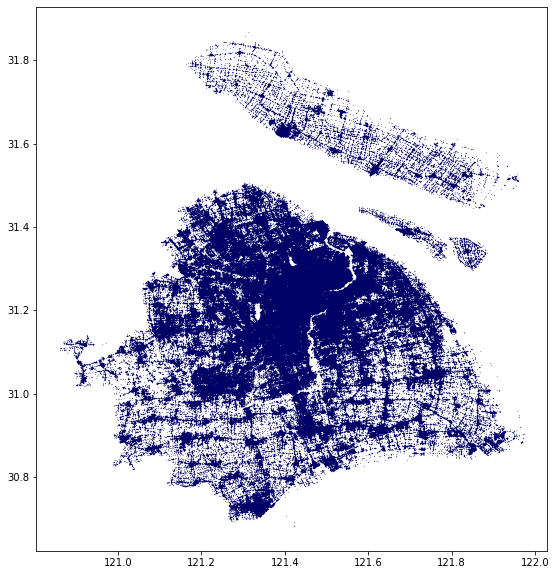

In [13]:
gdf_poi.plot(markersize=0.02, c='#000066', figsize=(15,10))

In [14]:
print(len(df_poi))
# We removed ? points outside of Shanghai

1745286


In [15]:
gdf_poi.head()

,NAME,longitude,latitude,GBCODE,category,subcategory,subsubcategory,geometry
0,2015年中国国际纱线(春夏)展览会,121.296368,31.188324,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name,POINT (121.296368 31.188324)
1,勃兰登堡之声-2015家庭音乐会,121.473360,31.228923,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name,POINT (121.47336 31.228923)
2,2015第十四届(上海)国际有机食品和绿色食品博览会,121.399378,31.205028,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name,POINT (121.399378 31.205028)
3,星星火炬上海组委会,121.529628,31.271063,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name,POINT (121.529628 31.271063)
4,2016VGT国际铁人三项赛,121.169185,31.282332,990000.0,Other points of interest,Natural Place Name Identification Points,Entrance name,POINT (121.169185 31.282332)


In [16]:
#there are duplicated lines in cendus_poi dataset
len(gdf_poi[gdf_poi.duplicated(keep = 'first', subset=gdf_poi.columns.difference(['geometry']))])

20062

In [17]:
gdf_poi = gdf_poi.drop_duplicates(keep = 'first', subset=gdf_poi.columns.difference(['geometry']))

In [18]:
from pyproj import Transformer

transformer = Transformer.from_crs("EPSG:4326", "EPSG:4479", always_xy=True)


def getNewLongitude(xy):
    return transformer.transform(xy[0], xy[1])[0]

def getNewLatitude(xy):
    return transformer.transform(xy[0], xy[1])[1]


gdf_poi['longitude_m'] = gdf_poi[['longitude', 'latitude']].copy().apply(getNewLongitude, axis=1)
gdf_poi['latitude_m'] = gdf_poi[['longitude', 'latitude']].copy().apply(getNewLatitude, axis=1)

In [19]:
gdf_poi = gdf_poi[['category','subcategory','longitude','latitude','longitude_m','latitude_m']]

In [20]:
gdf_poi.head()

,category,subcategory,longitude,latitude,longitude_m,latitude_m
0,Other points of interest,Natural Place Name Identification Points,121.296368,31.188324,-2.836906e+06,4.666557e+06
1,Other points of interest,Natural Place Name Identification Points,121.473360,31.228923,-2.850090e+06,4.655782e+06
2,Other points of interest,Natural Place Name Identification Points,121.399378,31.205028,-2.844792e+06,4.660630e+06
3,Other points of interest,Natural Place Name Identification Points,121.529628,31.271063,-2.853394e+06,4.650915e+06
4,Other points of interest,Natural Place Name Identification Points,121.169185,31.282332,-2.823743e+06,4.668218e+06


In [21]:
gdf_poi = gpd.GeoDataFrame(gdf_poi, geometry = [Point(x,y) for x,y in zip(gdf_poi.longitude_m, gdf_poi.latitude_m)])
gdf_poi.crs = {'init': 'epsg:4479'} #china metric projection

In [22]:
gdf_poi.to_pickle('../clean_pickles/cendus_poi.pk')

In [23]:
gdf_poi = pd.read_pickle('../clean_pickles/cendus_poi.pk')

In [24]:
gdf_target = pd.read_pickle('../clean_pickles/target.pk')

In [25]:
type(gdf_target)

geopandas.geodataframe.GeoDataFrame

In [26]:
gdf_target.crs

{'init': 'epsg:4479'}

In [27]:
#gdf_target = gpd.GeoDataFrame(df_target, geometry = 'geometry')
#gdf_target.crs = {'init': 'epsg:4479'} #china metric projection

In [28]:
gdf_poi.category.describe()

count      1725052
unique          15
top       Shopping
freq        361162
Name: category, dtype: object

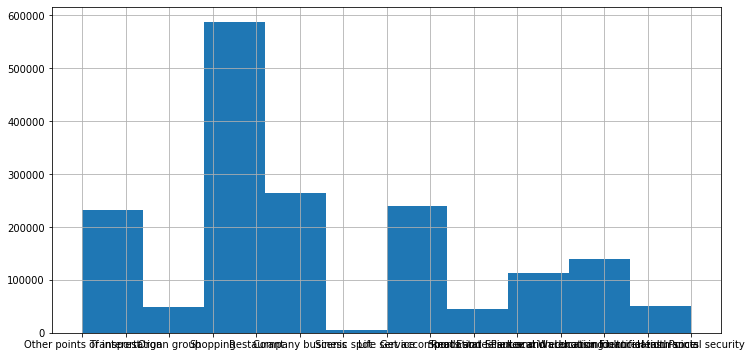

In [29]:
gdf_poi.category.hist(figsize=(12,6))

In [30]:
# Get the name of the categorie and their occurence
nameCat = gdf_poi.category.value_counts()
nameCat

Shopping                                   361162
Company business                           263754
Transportation                             231500
Restaurant                                 226086
Life service                               225625
Location Location Identification Points    140374
Real Estate Park and Warehousing            64546
Science and education culture               49197
Organ group                                 48292
Sports and leisure                          44912
Financial insurance                         26134
Health social security                      24384
Get accommodation                           13339
Scenic spot                                  5688
Other points of interest                       59
Name: category, dtype: int64

In [31]:
#gdf_poi_cat = gdf_poi[gdf_poi.category == "Shopping"]
gdf_poi_cat = gdf_poi[gdf_poi.category == "Life service"]
gdf_poi_cat.subcategory.value_counts()

Intermediary services                          80584
Other transport services and facilities        36289
Resident Services - Home Economics Services    27583
Vehicle service                                22102
Fare service                                   19299
Coal electricity and water vapor               15997
Parking lot                                     9358
Access facilities                               8210
Post and Telecommunications Express             2504
Marriage service                                2203
Daily service                                    785
Bridge Tunnel-Overpass                           579
Funeral services                                 132
Name: subcategory, dtype: int64

In [32]:
test = 'Other transport services and facilities'
test.find('Other')

0

In [33]:
#need ? to run
time = ManagingTime()
time.displayStartTime()

gdf_target = pd.read_pickle('../clean_pickles/target.pk')
area_buffer = gdf_target['surface_buffer'].iloc[0].area
nameCat = gdf_poi.category.value_counts()
for indexCat, valueCat in nameCat.items():
    clear_output()
    time.displayStartTime()
    print(indexCat)
    if indexCat.find('Other') > -1 :
        continue
    nameColumns = 'nb_' + indexCat.replace(' ', '_').lower() + '_cendus'
    gdf_poi_cat = gdf_poi[gdf_poi.category == indexCat].copy()    
    gdf_target[nameColumns] = np.nan
    
    for index,value in gdf_target.iterrows():
        gdf_target[nameColumns].loc[index] = len(gdf_poi_cat.loc[gdf_poi_cat.within(value.surface_buffer)]) / area_buffer
        
    
    gdf_target.to_pickle('../clean_pickles/target_cendus_poi.pk')

time.displayRunningTime()

Starting time: 2020-01-06 00:22:28.242229
Other points of interest
Running time: 2:40:49.960352


In [34]:
nameCat

Shopping                                   361162
Company business                           263754
Transportation                             231500
Restaurant                                 226086
Life service                               225625
Location Location Identification Points    140374
Real Estate Park and Warehousing            64546
Science and education culture               49197
Organ group                                 48292
Sports and leisure                          44912
Financial insurance                         26134
Health social security                      24384
Get accommodation                           13339
Scenic spot                                  5688
Other points of interest                       59
Name: category, dtype: int64

In [38]:
#need ? to run
time = ManagingTime()
time.displayStartTime()

gdf_target = pd.read_pickle('../clean_pickles/target.pk')
area_buffer = gdf_target['surface_buffer'].iloc[0].area
nameCat = gdf_poi.category.value_counts()
for indexCat, valueCat in nameCat.items():
    if indexCat.find('Other') > -1:
        continue
    
    gdf_poi_cat = gdf_poi[gdf_poi.category == indexCat].copy()        
    nameSubCat = gdf_poi_cat.subcategory.value_counts()
    for indexSubCat, valueSubCat in nameSubCat.items():
        clear_output()
        time.displayStartTime()
        print(indexSubCat)
        if indexSubCat.find('Other') > -1:
            continue
        nameColumns = 'nb_' + indexSubCat.replace(' ', '_').lower() + '_cendus'
        gdf_poi_subcat = gdf_poi_cat[gdf_poi_cat.subcategory == indexSubCat].copy()    
        gdf_target[nameColumns] = np.nan

        for index,value in gdf_target.iterrows():
            gdf_target[nameColumns].loc[index] = len(gdf_poi_subcat.loc[gdf_poi_subcat.within(value.surface_buffer)]) / area_buffer
        
        
    gdf_target.to_pickle('../clean_pickles/target_cendus_poi_sub.pk')

    
time.displayRunningTime()

Starting time: 2020-01-06 12:04:33.720493
Bath Hot Spring Place
Running time: 1:29:55.537267


In [36]:
gdf_target.head()

,clean,smell,noise,longitude,latitude,geometry,longitude_m,latitude_m,surface_buffer,nb_home_building_materials_retail_shop_cendus,...,nb_integrated_market_cendus,nb_home_appliance_digital_retail_store_cendus,nb_commodity_retail_stores_cendus,nb_vehicle_sales_shop_cendus,"nb_flower,_bird,_insect_and_fish_market_cendus",nb_clocks_and_jewelry_retail_store_cendus,nb_food-beverage_and_tobacco_products_retail_stores_cendus,nb_retail_store_of_sporting_goods_cendus,nb_market_cendus,nb_characteristic_commercial_street_cendus
0,3,0.0,0.0,121.104287,31.155882,POINT (-2822207.586532274 4677635.626522204),-2.822208e+06,4.677636e+06,POLYGON ((-2821707.586532274 4677635.626522204...,0.000096,...,0.000071,0.000040,0.000031,0.000015,0.000061,0.000018,0.000031,0.000034,0.000008,0.000001
1,3,1.0,0.0,121.351529,31.144327,POINT (-2842710.938446562 4665979.72602233),-2.842711e+06,4.665980e+06,"POLYGON ((-2842210.938446562 4665979.72602233,...",0.000040,...,0.000048,0.000024,0.000006,0.000027,0.000009,0.000004,0.000015,0.000005,0.000003,0.000003
2,2,0.0,0.0,121.468520,31.042285,POINT (-2855282.42475198 4665148.863744967),-2.855282e+06,4.665149e+06,"POLYGON ((-2854782.42475198 4665148.863744967,...",0.000019,...,0.000024,0.000015,0.000001,0.000004,0.000003,0.000001,0.000006,0.000000,0.000001,0.000000
3,3,0.0,0.0,121.367237,31.240725,POINT (-2841108.748930959 4660473.749148724),-2.841109e+06,4.660474e+06,POLYGON ((-2840608.748930959 4660473.749148724...,0.000036,...,0.000034,0.000005,0.000003,0.000040,0.000005,0.000001,0.000013,0.000003,0.000000,0.000000
4,2,NaN,0.0,121.403601,31.269155,POINT (-2843213.856075277 4657273.732656028),-2.843214e+06,4.657274e+06,POLYGON ((-2842713.856075277 4657273.732656028...,0.000028,...,0.000026,0.000013,0.000079,0.000001,0.000004,0.000034,0.000006,0.000024,0.000010,0.000001
